# Case study - Cancer Detection

# Objective:
Using historical data about patients who were diagnosed with cancer, enable the doctors to confidently differentiate malignant 
cases from benign given the independent attributes.  
Prepare the data and create the model.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cancer_data = pd.read_csv('bc2.csv')
cancer_dataset = pd.DataFrame(cancer_data)
cancer_dataset.columns

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [4]:
cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
cancer_dataset.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
cancer_dataset = cancer_dataset.replace('?', np.nan)
cancer_dataset = cancer_dataset.apply(lambda x: x.fillna(x.median()),axis=0)

# converting the hp column from object 'Bare Nuclei'/ string type to float
cancer_dataset['Bare Nuclei'] = cancer_dataset['Bare Nuclei'].astype('float64')  

In [7]:
cancer_dataset.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

/Users/vverdhan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/vverdhan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


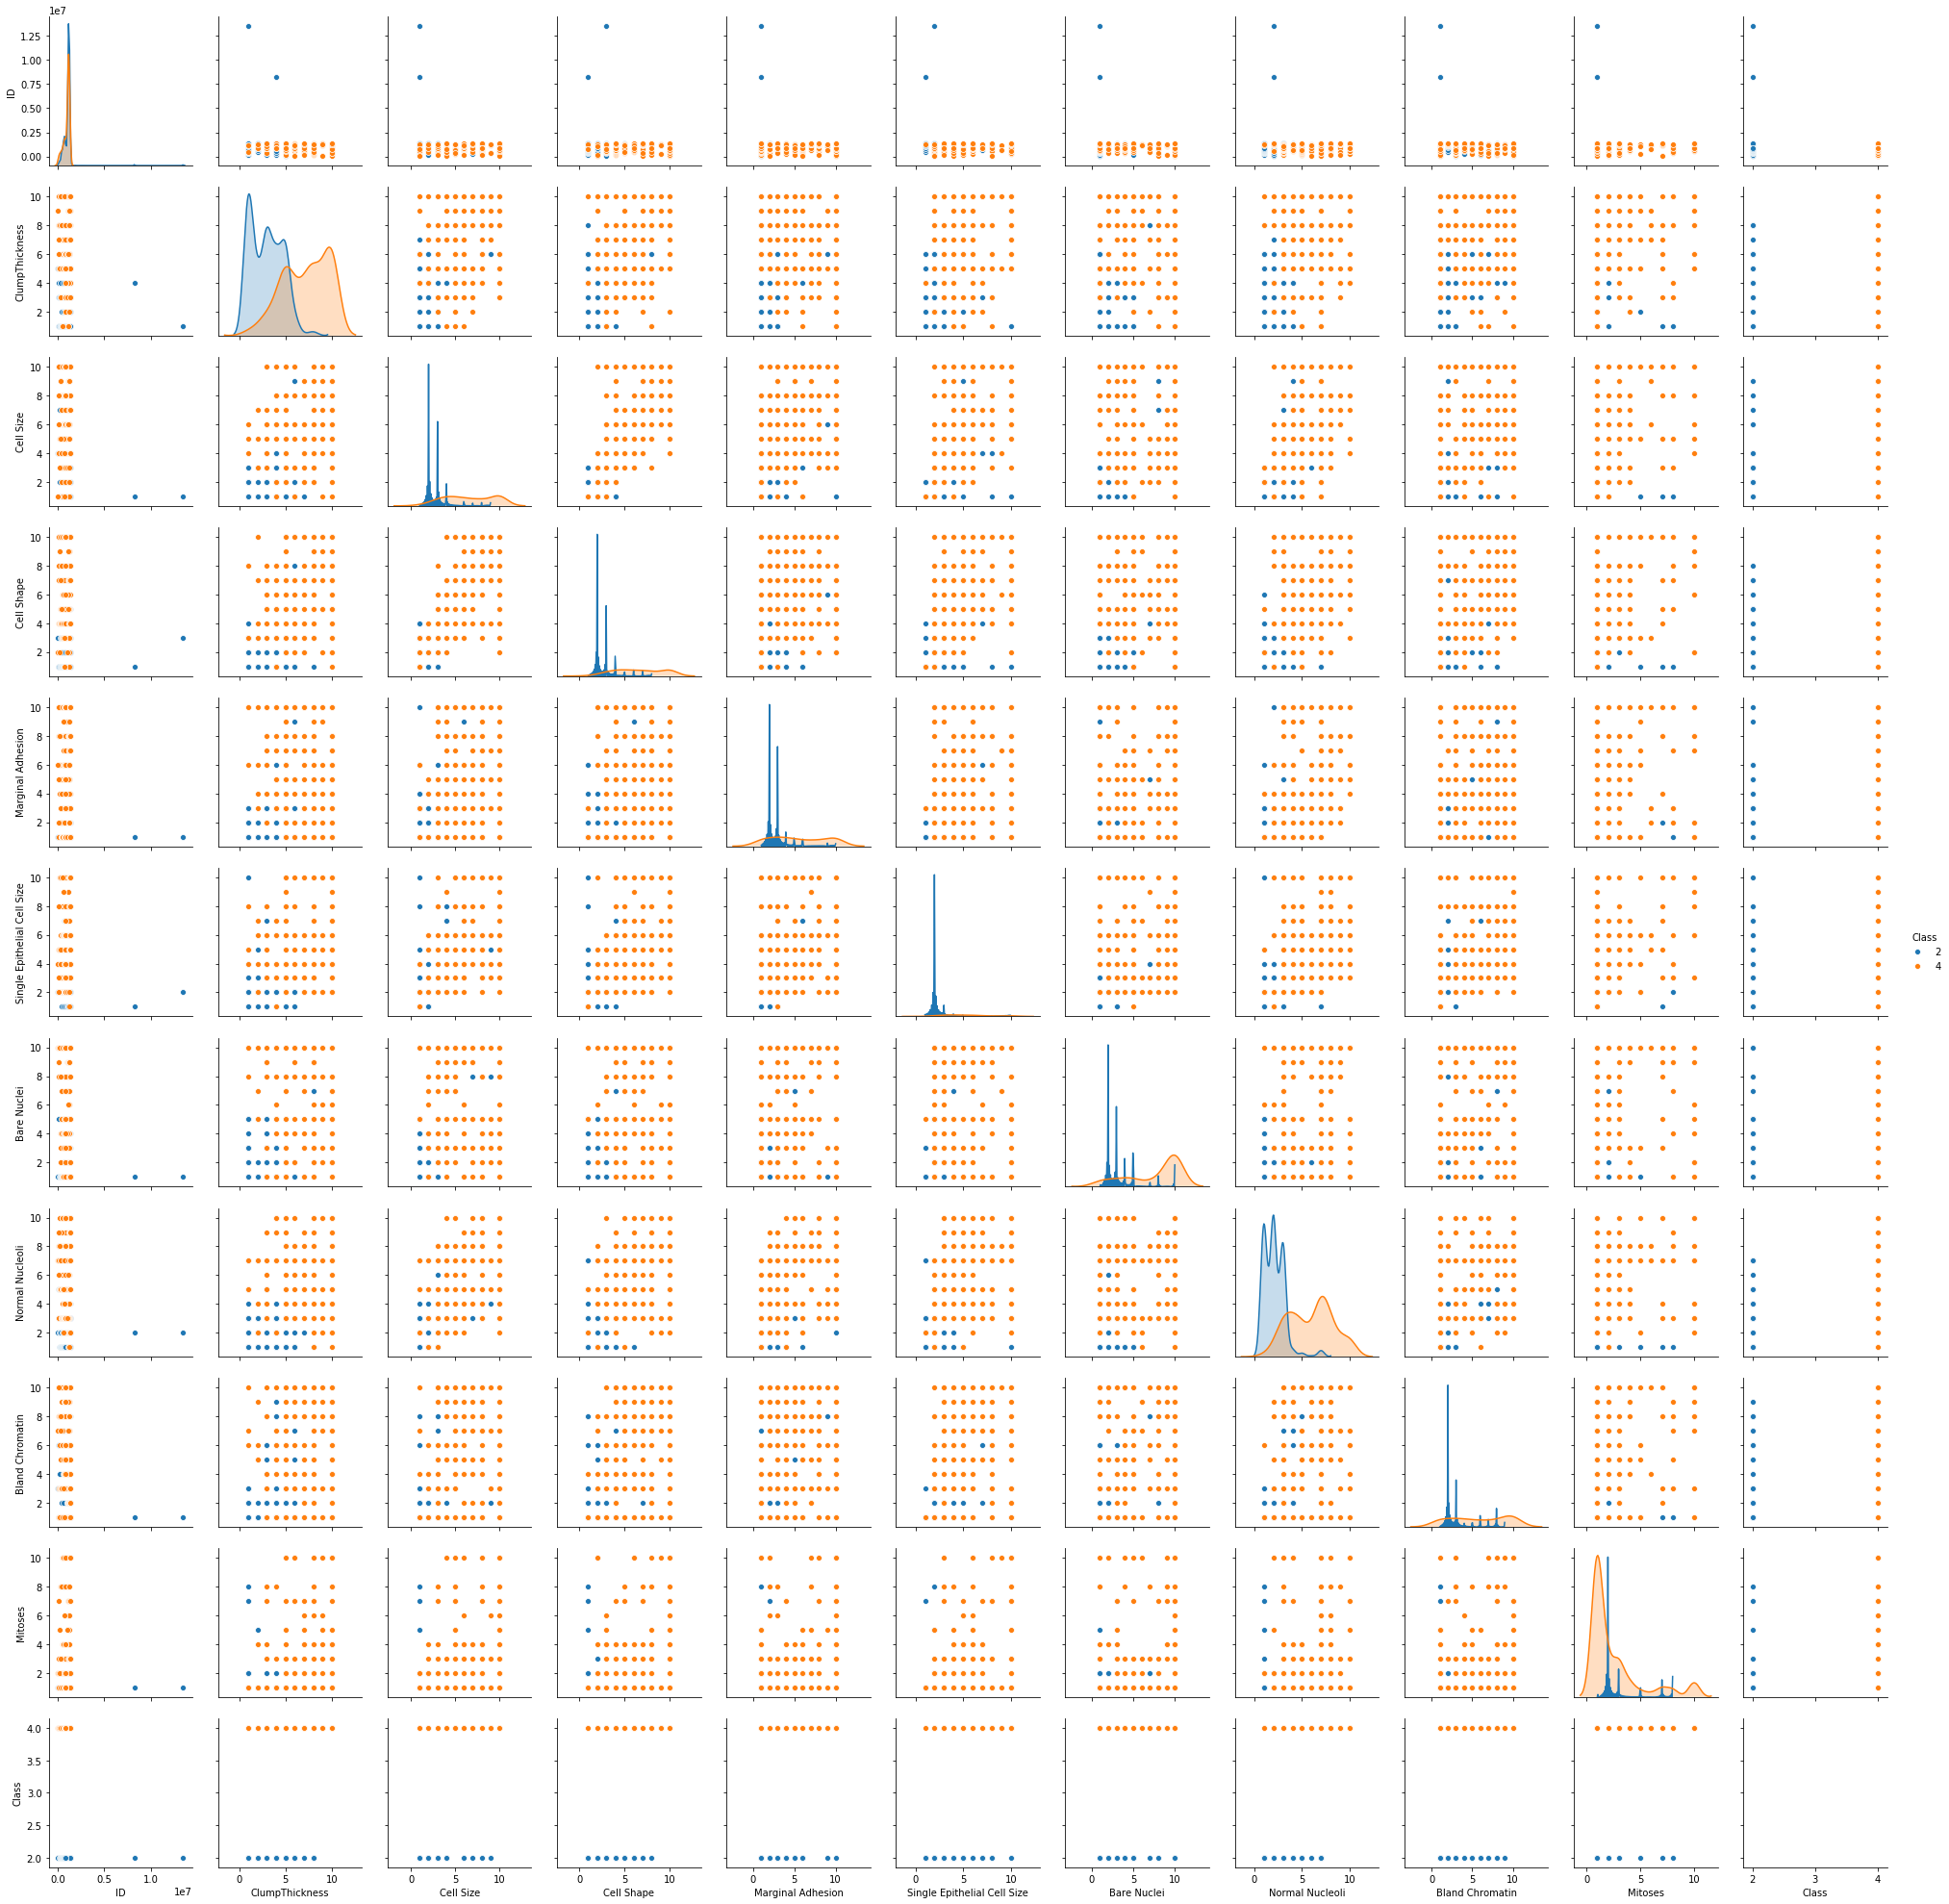

In [8]:
sns.pairplot(cancer_dataset, diag_kind = "kde", hue = "Class")

In [9]:
from sklearn.model_selection import train_test_split

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

target_variable = cancer_dataset["Class"]
features = cancer_dataset.drop(["ID","Class"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features,target_variable, test_size = 0.25, random_state = 5)

In [10]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

svc_prediction = svc_model .predict(X_test)


In [11]:
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9751908396946565
0.9485714285714286


In [12]:
print("Confusion Matrix:\n",confusion_matrix(svc_prediction,y_test))

Confusion Matrix:
 [[108   4]
 [  5  58]]


In [13]:
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

SVC()

In [14]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9751908396946565
0.96


In [15]:
svc_model  = SVC(kernel='poly')
svc_model.fit(X_train, y_train)

svc_prediction = svc_model.predict(X_test)

print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.982824427480916
0.9371428571428572


In [16]:
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)

svc_prediction = svc_model.predict(X_test)

print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.4541984732824427
0.42857142857142855
